In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import datasets 

In [3]:
df = pd.read_csv('car_insurance_dataset.csv')

In [4]:
df.head()

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)
0,56,32,4,17,2002,23,488.35
1,46,19,0,21,2025,0,486.15
2,32,11,4,15,2020,5,497.55
3,60,0,4,19,1991,34,498.35
4,25,7,0,13,2005,20,495.55


C:\Users\dell\AppData\Local\Temp\ipykernel_30204\2523618138.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Driver Age'])


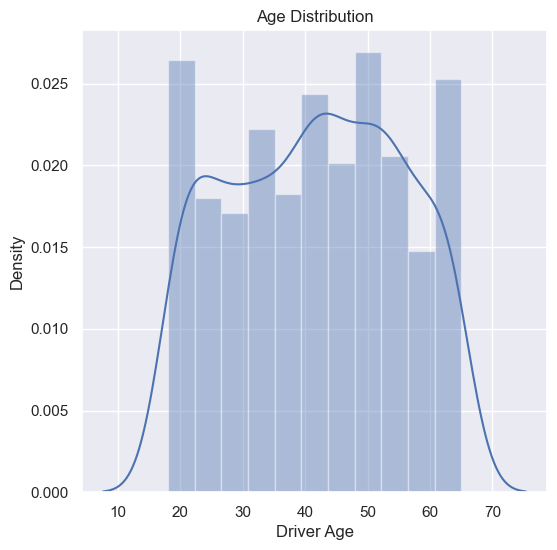

In [5]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['Driver Age'])
plt.title('Age Distribution')
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_30204\3072469206.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Driver Experience'])


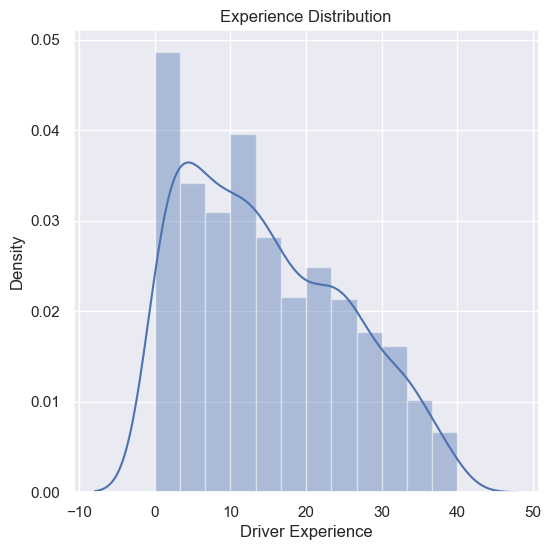

In [6]:
# distribution of Experience value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['Driver Experience'])
plt.title('Experience Distribution')
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_30204\4007927205.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Previous Accidents'])


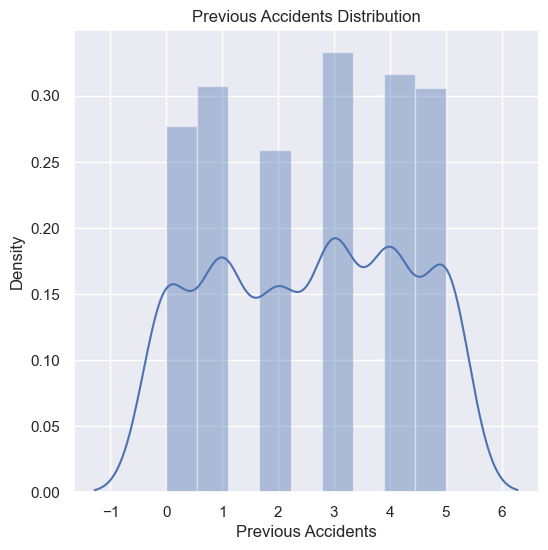

In [7]:
# distribution of Previous Accidents	
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['Previous Accidents'])
plt.title('Previous Accidents Distribution')
plt.show()

In [8]:
df['Previous Accidents'].value_counts()

Previous Accidents
3    185
4    176
1    171
5    170
0    154
2    144
Name: count, dtype: int64

C:\Users\dell\AppData\Local\Temp\ipykernel_30204\2545235763.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual Mileage (x1000 km)'])


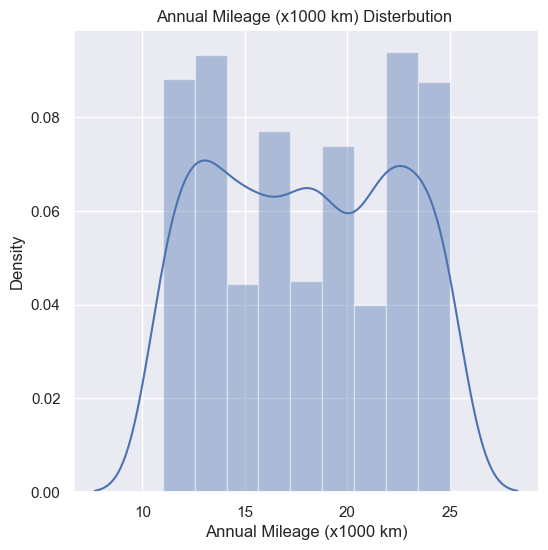

In [9]:
# distribution of Annual Mileage (x1000 km)	
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['Annual Mileage (x1000 km)'])
plt.title('Annual Mileage (x1000 km) Disterbution ')
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_30204\2261576408.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Car Manufacturing Year'])


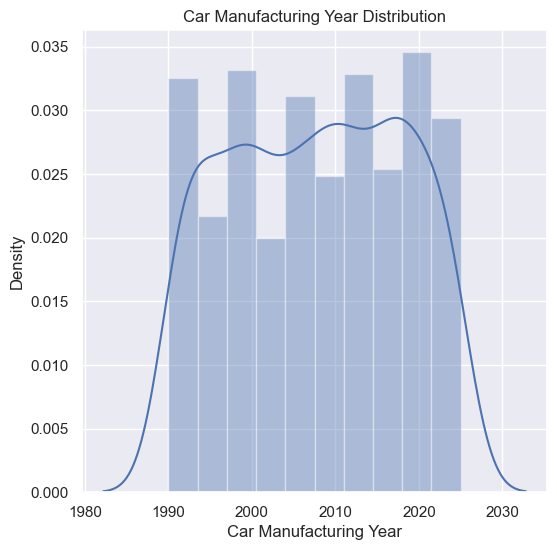

In [10]:
# distribution of Car Manufacturing Year	
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['Car Manufacturing Year'])
plt.title('Car Manufacturing Year Distribution')
plt.show()

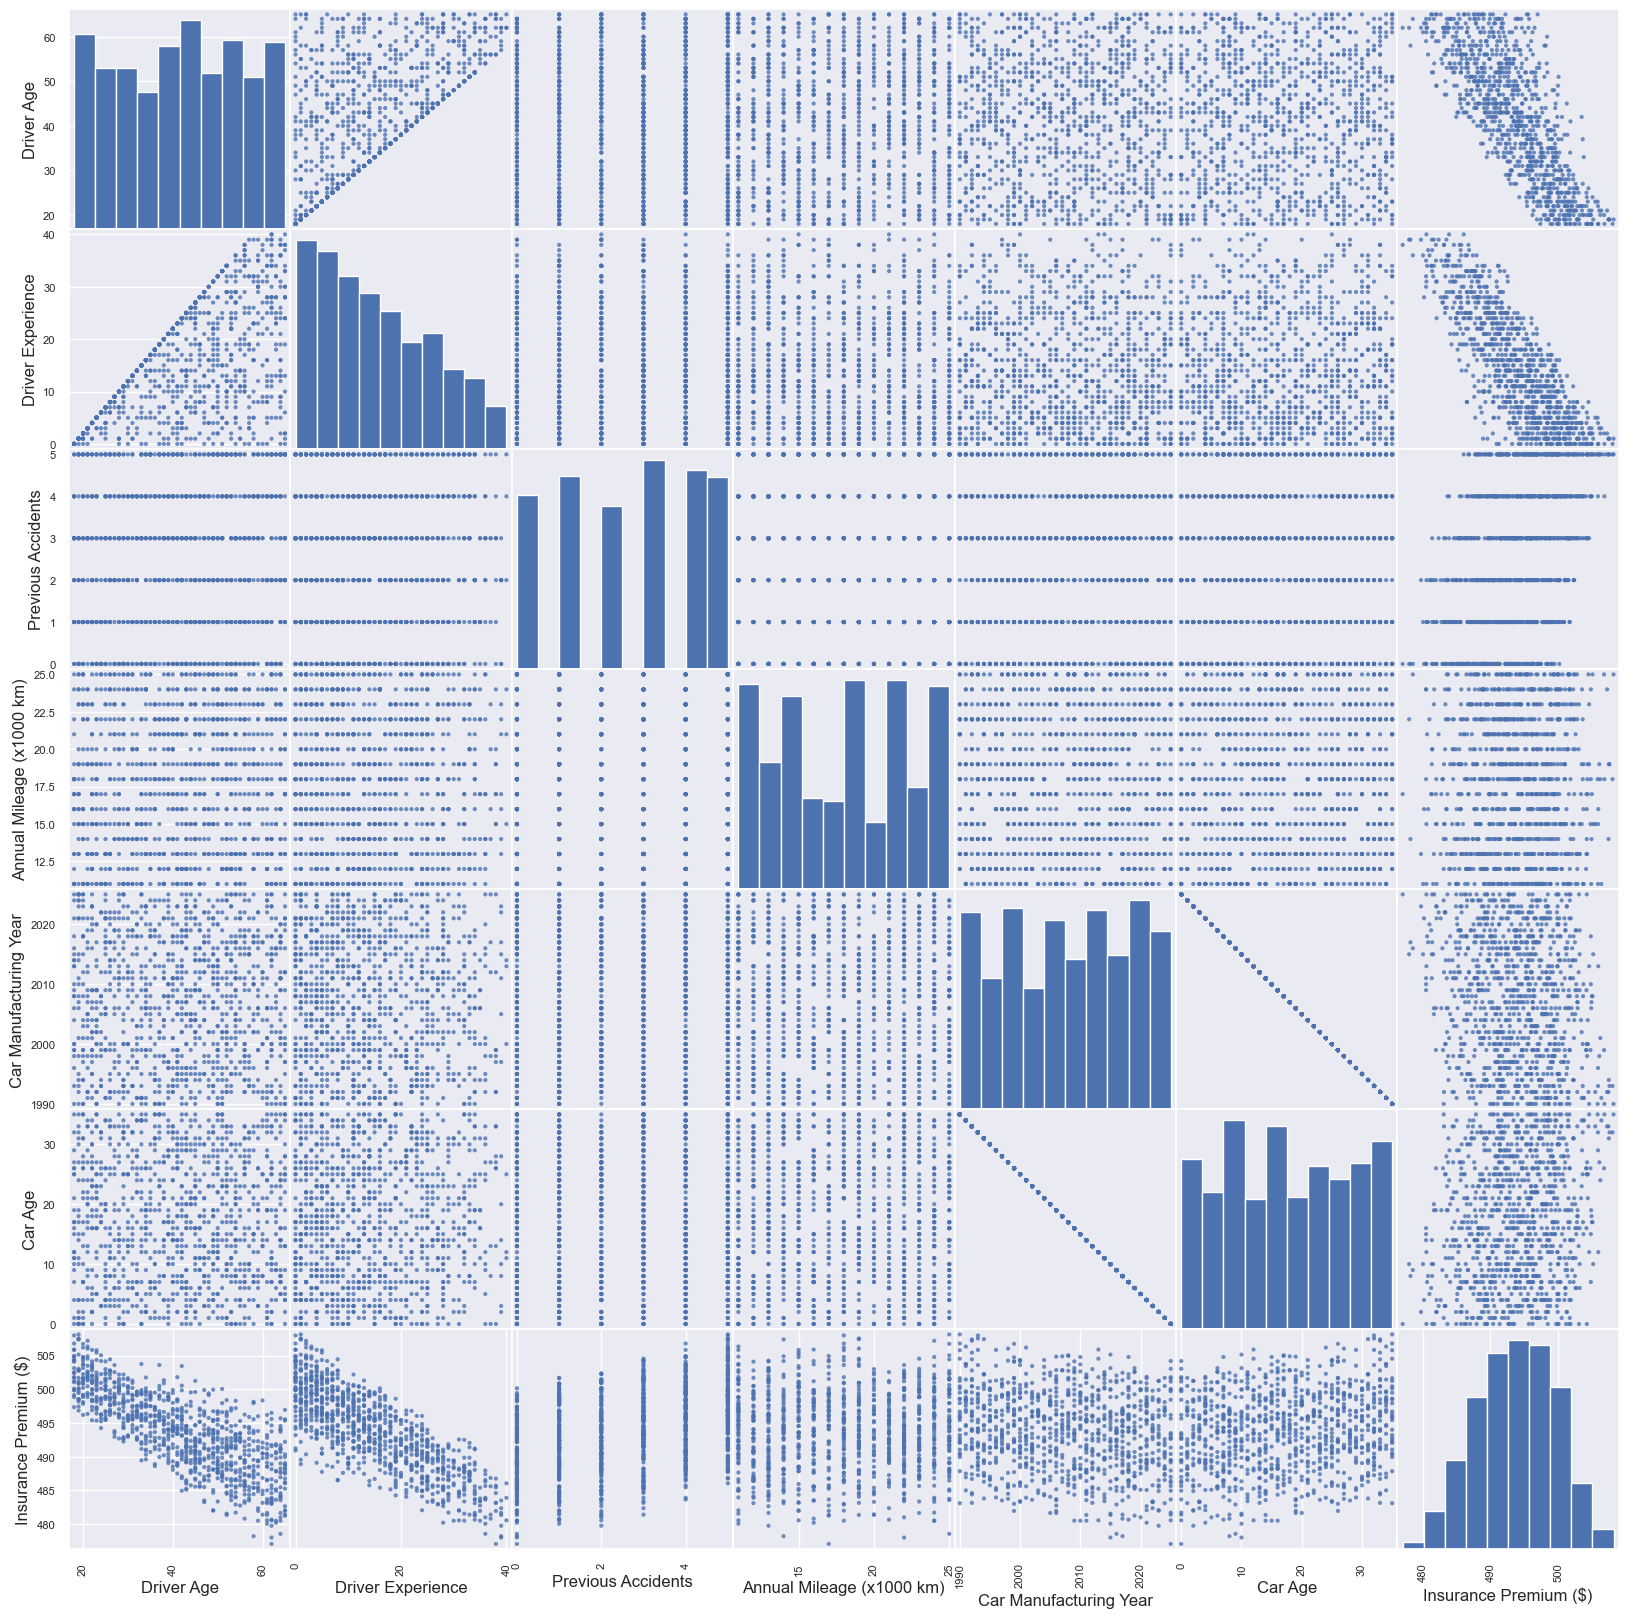

In [11]:
from pandas.plotting import scatter_matrix

# Example: Assuming df is your DataFrame
scatter_matrix(df, alpha=0.8, figsize=(20, 20), diagonal='hist')
plt.show()

In [12]:
df.isnull().sum()

Driver Age                   0
Driver Experience            0
Previous Accidents           0
Annual Mileage (x1000 km)    0
Car Manufacturing Year       0
Car Age                      0
Insurance Premium ($)        0
dtype: int64

#### **Feaure Selection**

In [13]:
# Features and target
X = df[["Driver Age", "Driver Experience", "Previous Accidents", "Annual Mileage (x1000 km)", "Car Manufacturing Year", "Car Age"]]
y = df["Insurance Premium ($)"]

#### **RFE**

In [14]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Replace RandomForestClassifier with RandomForestRegressor
model = RandomForestRegressor()
rfe = RFE(model, n_features_to_select=3)
X_rfe = rfe.fit_transform(X, y)

# Get the selected feature indices
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Driver Age', 'Driver Experience', 'Previous Accidents'], dtype='object')


#### **PCA**

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Apply PCA
pca = PCA(n_components=len(df.columns) - 1) # Use all components
pca.fit(X_scaled)

# Get the components matrix
pca_components = pd.DataFrame(
    pca.components_,
    columns=df.columns,
    index=[f"PC{i+1}" for i in range(len(df.columns) - 1)]
)

print("PCA Components Matrix:")
print(pca_components)

PCA Components Matrix:
     Driver Age  Driver Experience  Previous Accidents  \
PC1   -0.516434          -0.516953            0.154345   
PC2   -0.176536          -0.216313           -0.022715   
PC3    0.240276           0.186436            0.901862   
PC4    0.010712          -0.096424           -0.229108   
PC5    0.719086          -0.688471           -0.028934   
PC6   -0.001916          -0.002202            0.001774   

     Annual Mileage (x1000 km)  Car Manufacturing Year   Car Age  \
PC1                  -0.004016               -0.178776  0.178776   
PC2                  -0.009526                0.676999 -0.676999   
PC3                   0.233309                0.069008 -0.069008   
PC4                   0.968340               -0.010312  0.010312   
PC5                  -0.083437               -0.018387  0.018387   
PC6                   0.000153                0.706736  0.707457   

     Insurance Premium ($)  
PC1               0.615057  
PC2               0.069159  
PC3   

In [16]:
# Compute feature importance
feature_importance = pca_components.sum(axis=0).sort_values(ascending=False)

# Select the top 3 features
top_3_features = feature_importance.head(5)
print("Top 3 Features based on PCA:")
print(top_3_features)

Top 3 Features based on PCA:
Car Manufacturing Year       1.245267
Annual Mileage (x1000 km)    1.104822
Insurance Premium ($)        0.860798
Previous Accidents           0.777224
Driver Age                   0.275189
dtype: float64


#### **Univariate selection** 

In [17]:
from sklearn.feature_selection import SelectKBest, f_regression

# Apply SelectKBest
k = 3  # Number of features to select
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['Driver Age', 'Driver Experience', 'Previous Accidents'], dtype='object')


In [72]:
from sklearn.model_selection import train_test_split

X = df[["Driver Age", "Driver Experience", "Previous Accidents"]]
# X = df.drop(columns=["Insurance Premium ($)"])
y = df["Insurance Premium ($)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [73]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pickle

In [74]:

# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {'Model': model_name, 'RMSE': round(rmse, 2), 'R2 Score': round(r2, 4)}

In [75]:
# Preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
pickle.dump(scaler , open('Scaler.pkl' , 'wb'))

In [76]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
linear_pred = linear_model.predict(X_test_scaled)
linear_eval = evaluate_model(y_test, linear_pred, 'Linear Regression')
print(linear_eval)
pickle.dump(linear_model , open('linear_model.pkl' , 'wb'))


{'Model': 'Linear Regression', 'RMSE': np.float64(1.04), 'R2 Score': 0.9682}


In [77]:
# Support Vector Machine
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)
svr_pred = svr_model.predict(X_test_scaled)
svr_eval = evaluate_model(y_test, svr_pred, 'SVM')
print(svr_eval)
pickle.dump(svr_model , open('svr_model.pkl' , 'wb'))

{'Model': 'SVM', 'RMSE': np.float64(1.19), 'R2 Score': 0.9585}


In [78]:
# K-Nearest Neighbors
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
knn_eval = evaluate_model(y_test, knn_pred, 'KNN')
print(knn_eval)
pickle.dump(knn_model , open('knn_model.pkl' , 'wb'))

{'Model': 'KNN', 'RMSE': np.float64(1.24), 'R2 Score': 0.9549}


In [79]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_eval = evaluate_model(y_test, rf_pred, 'Random Forest')
print(rf_eval)
pickle.dump(rf_model , open('rf_model.pkl' , 'wb'))

{'Model': 'Random Forest', 'RMSE': np.float64(1.22), 'R2 Score': 0.9563}


In [80]:
# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)
gb_pred = gb_model.predict(X_test_scaled)
gb_eval = evaluate_model(y_test, gb_pred, 'Gradient Boosting')
print(gb_eval)
pickle.dump(gb_model , open('gb_model.pkl' , 'wb'))

{'Model': 'Gradient Boosting', 'RMSE': np.float64(1.11), 'R2 Score': 0.964}


In [81]:
# Simple Averaging
predictions = {
    'Linear Regression': linear_pred,
    'SVM': svr_pred,
    'KNN': knn_pred,
    'Random Forest': rf_pred,
    'Gradient Boosting': gb_pred
}

simple_avg_pred = np.mean(np.array(list(predictions.values())), axis=0)
simple_avg_eval = evaluate_model(y_test, simple_avg_pred, 'Simple Average')
print(simple_avg_eval)

{'Model': 'Simple Average', 'RMSE': np.float64(1.09), 'R2 Score': 0.965}


In [71]:
# Results Summary
evaluation_results = pd.DataFrame([linear_eval, svr_eval, knn_eval, rf_eval, gb_eval, simple_avg_eval])
print("\nModel Evaluation Results:")
print(evaluation_results)


Model Evaluation Results:
               Model  RMSE  R2 Score
0  Linear Regression  0.00    1.0000
1                SVM  0.63    0.9883
2                KNN  1.02    0.9694
3      Random Forest  0.75    0.9834
4  Gradient Boosting  0.52    0.9921
5     Simple Average  0.45    0.9940
